# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>

# Question 1: Bias-Variance

a) Assume there is a data generator $Y=f(X)+\epsilon$, which is generating Data(X, Y), where $\epsilon$ is the added random gaussian noise. We are trying to fit a curve to the samples generated from the data generator, using an estimator. The estimator can be represented as $g(X|\theta)$, where $\theta$ represents the parameters. For any test point $x_0$, what does the following mathematical representation mean? Is this the bias or variance of the estimator? $$E[g(x_0)]-f(x_0)$$

b) Use your own words to describe why there is a tradeoff between bias and variance. 

## Answer:

a: It means the difference between the expected value of the generated value using the fitted curve and what can be called actual data (as this was generated from the given function with error term). In other words, this is bias.  

b: In a easier expression, variance means the extent to which the result from a function is change, 
when one uses different data sets. On the other hands, bais can be expressed as the systematic differences inherent in the parameter in question. A tradeoff between them occurs as we trying to make a decision on our model, methodology in estimating our parameters, and so on. Basically, as we try to capture the reality(population) as much as possible, for example, by increasing model complexity, the bias tends to decrease. 

However, as specified earlier, our data set contains some irreducible error. Thus, more complex model would fit the parameters even for these errors, making increased error rate with other data set. We sometimes call this phenominon over-fitting. There are always issues related to this tradeoff. What we do so is to try to find a sweat-spot making the total error minimized, which includes variance, bias, and irreducible error. Even the irreducible error can be reduced with different dimensions captured by different set of predicting variables. 

# Question 2: Bias-Variance exploration

We want to build a model that can predict y for unknown inputs x.

(a) Fit polynomial models of degrees 2, 4, 7 to the training data.  
1. Print out the mean squared error (on both train and test sets) for all the models.  
2. Plot two scatter plots (y_train,x_train) and (y_test, x_test)  
3. Plot the fitted models (predictions on x (different model)s vs x)  
4. Plot the predictions on the test set (predictions on x_test by different models vs x_test).  
All the plots must be in the same figure and be clearly labeled.  
**Tips**: you can use `np.vander(np.squeeze(x_train), deg+1)` to generate the `deg`-degree polynomial vector of `x_train`. For example, `np.vander(np.squeeze(x_train), 3)` gives you the second-degree polynomial of `x_train`.


(b) Which model gives the best performance? Explain in terms of the bias-variance tradeoff.

(c) Analyse how the training data size affects the bias and the variance of the models. For this, run the analysis in (a) using 20, 40, 60, 80 and all 100 data points. Make a **single** plot of the $log(MSE)$ for both the training and the test data vs the size of the training set for each of the polynomials. State the trends you see as you change the size of the training data on each of the models and explain why you see them.
**You can use the following codes to load the dataset and complete the analysis**:


In [1]:
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import math
import operator
%matplotlib inline

data_load = np.load('./data.npy', allow_pickle=True)
x_train = data_load.item().get("Xtrain")
y_train = data_load.item().get("Ytrain")
x_test = data_load.item().get("Xtest")
y_test =data_load.item().get("Ytest")
x_all = np.linspace(-10,10,101).reshape(-1,1)

lrp = LinearRegression()

## Answer for Q2-A

In [2]:
def plot_curves(x_train, y_train, x_test, y_test):
            
    x_train_poly2 = np.vander(np.squeeze(x_train), 3)
    x_test_poly2 = np.vander(np.squeeze(x_test), 3)
    x_test1 = x_test
    x_all_poly2 = np.vander(np.squeeze(x_all), 3)
    
    x_train_poly4 = np.vander(np.squeeze(x_train), 5)
    x_test_poly4 = np.vander(np.squeeze(x_test), 5)
    x_test2 = x_test
    x_all_poly4 = np.vander(np.squeeze(x_all), 5)
    
    x_train_poly7 = np.vander(np.squeeze(x_train), 8)
    x_test_poly7 = np.vander(np.squeeze(x_test), 8)
    x_test3 = x_test
    x_all_poly7 = np.vander(np.squeeze(x_all), 8)
    
        
    regression2 = lrp.fit(x_train_poly2, y_train)
    y_pred_train_poly2 = regression2.predict(x_train_poly2)
    y_pred2 = regression2.predict(x_test_poly2)
    y_pred2_all = regression2.predict(x_all_poly2)

    MSE_train2 = mean_squared_error(y_train, y_pred_train_poly2)
    MSE_test2 = mean_squared_error(y_test, y_pred2)
    
    regression4 = lrp.fit(x_train_poly4, y_train)
    y_pred_train_poly4 = regression4.predict(x_train_poly4)
    y_pred4 = regression4.predict(x_test_poly4)
    y_pred4_all = regression4.predict(x_all_poly4)
    
    MSE_train4 = mean_squared_error(y_train, y_pred_train_poly4)
    MSE_test4 = mean_squared_error(y_test, y_pred4) 

    regression7 = lrp.fit(x_train_poly7, y_train)
    y_pred_train_poly7 = regression7.predict(x_train_poly7)
    y_pred7 = regression7.predict(x_test_poly7)
    y_pred7_all = regression7.predict(x_all_poly7)

    MSE_train7 = mean_squared_error(y_train, y_pred_train_poly7)
    MSE_test7 = mean_squared_error(y_test, y_pred7)
    
    print("Training Set MSE with Degree 2: {}".format(MSE_train2))
    print("Test Set MSE with Degree 2: {}".format(MSE_test2))
    
    print("Training Set MSE with Degree 4: {}".format(MSE_train4))
    print("Test Set MSE with Degree 4: {}".format(MSE_test4))
    
    print("Training Set MSE with Degree 7: {}".format(MSE_train7))
    print("Test Set MSE with Degree 7: {}".format(MSE_test7))
    
    L = sorted(zip(x_test1,y_pred2), key=operator.itemgetter(0))
    x_test1, y_pred2 = zip(*L)
    L1 = sorted(zip(x_test2,y_pred4), key=operator.itemgetter(0))
    x_test2, y_pred4 = zip(*L1)
    L2 = sorted(zip(x_test3,y_pred7), key=operator.itemgetter(0))
    x_test3, y_pred7 = zip(*L2)
    
    # y_train vs x_train
    # y_test vs x_test
    # predictions on the test set (predictions on x_test by different modes vs x_test)
    fig1 = plt.figure(figsize=(10,8))
    plt.scatter(x_train, y_train, label = "y_train vs x_train", color='orange')
    plt.scatter(x_test, y_test, label = "y_test vs x_test", color = 'red')
    plt.plot(x_test1, y_pred2, label = "predictions on x_test by degree 2 model", color='darkgray')
    plt.plot(x_test1, y_pred4, label = "predictions on x_test by degree 4 model", color='r')
    plt.plot(x_test1, y_pred7, label = "predictions on x_test by degree 7 model", color='blue')
    plt.xlabel('x')
    plt.ylabel('y')
    fig1.suptitle('x_train vs y_train & x_test vs y_test & predictions on the test set')
    plt.legend()
    plt.show()
    
    # fitted models (predictions on x_all by different models vs x_all)
    fig3 = plt.figure(figsize=(10,8))
    plt.plot(x_all, y_pred2_all, label = "degree 2")
    plt.plot(x_all, y_pred4_all, label = "degree 4")
    plt.plot(x_all, y_pred7_all, label = "degree 7")
    plt.xlabel('x_all')
    plt.ylabel('predictions on x_all by different models')
    fig3.suptitle('Fitted Models')
    plt.legend()
    plt.show()

    return [MSE_train2, MSE_train4, MSE_train7], [MSE_test2, MSE_test4, MSE_test7]


Training Set MSE with Degree 2: 247.29679797371534
Test Set MSE with Degree 2: 320.0640834697786
Training Set MSE with Degree 4: 31.720018057290055
Test Set MSE with Degree 4: 31.292082886606718
Training Set MSE with Degree 7: 30.677193592109724
Test Set MSE with Degree 7: 33.41069407769015


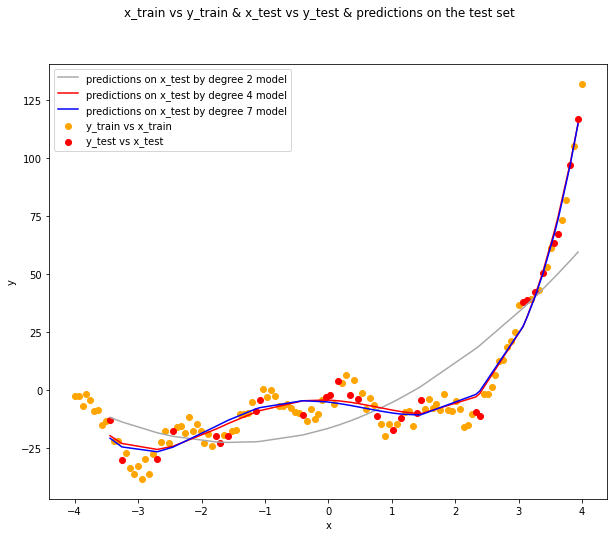

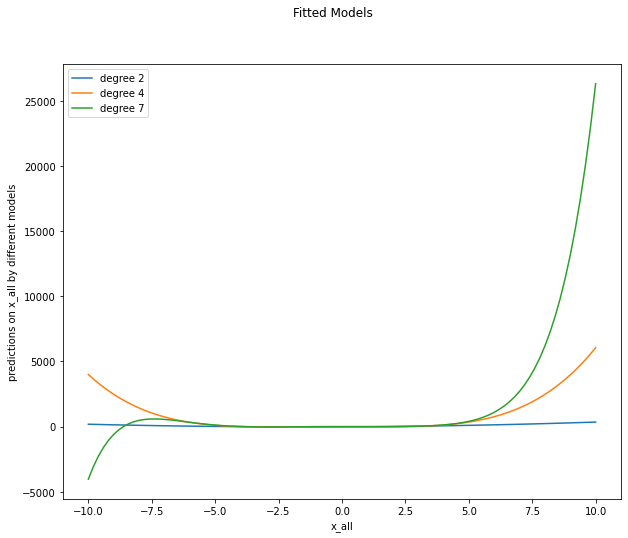

In [3]:
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

## Answer for Q2-B

The model which gives the best result in terms of MSE is the model with polynomial 4.  
Even though the training set MSE is lowest at the model of 7 polynomial, the test set MSE is slightly higher than that of 4 polynomical model. The lower MSE of poly 4 model might be explained by bias-variacne trade-off. As the model complexcity increases from polynomial 2 to 7 - as the model complexity increases, the the variance also inceases and bias decreases. In this process the model with polynomial 7 did little bit of over-fitting compared to the model with 4 polynomial by even fitting the noise contained in the data. That's why model with 4 polynomial gives us the best result among all the models

## Answer for Q2-C

20% data
Training Set MSE with Degree 2: 161.17147378830043
Test Set MSE with Degree 2: 402.3231269099288
Training Set MSE with Degree 4: 35.1151131391298
Test Set MSE with Degree 4: 38.340744983442725
Training Set MSE with Degree 7: 22.54394669137334
Test Set MSE with Degree 7: 135.20764526756744


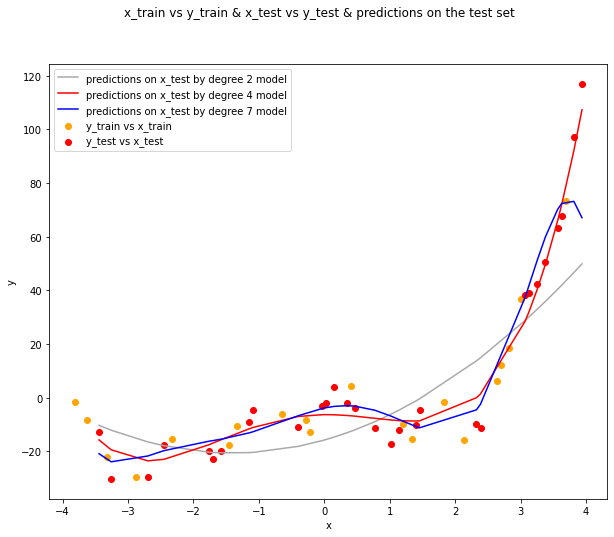

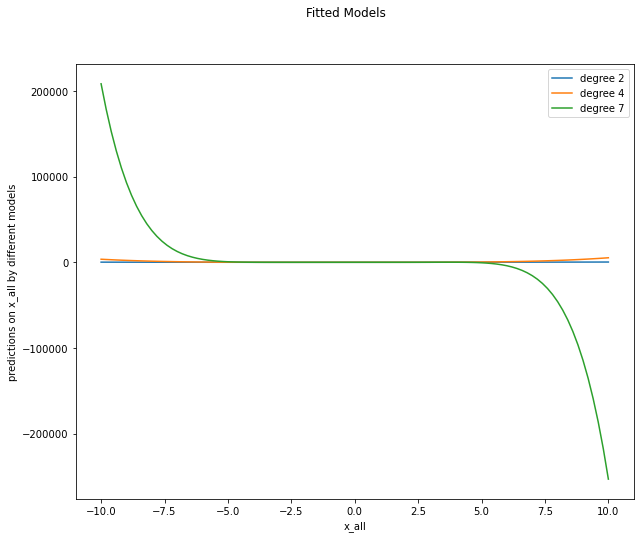

40% data
Training Set MSE with Degree 2: 150.33251286085704
Test Set MSE with Degree 2: 405.80516696165745
Training Set MSE with Degree 4: 31.624529646446906
Test Set MSE with Degree 4: 33.16428295918744
Training Set MSE with Degree 7: 25.492718751653634
Test Set MSE with Degree 7: 61.237418845510476


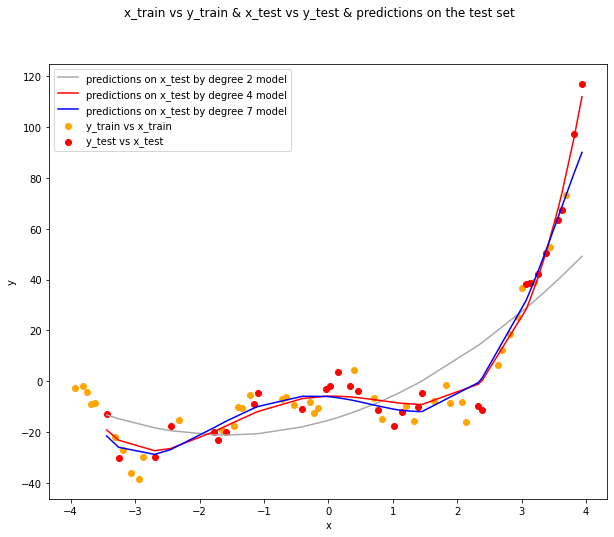

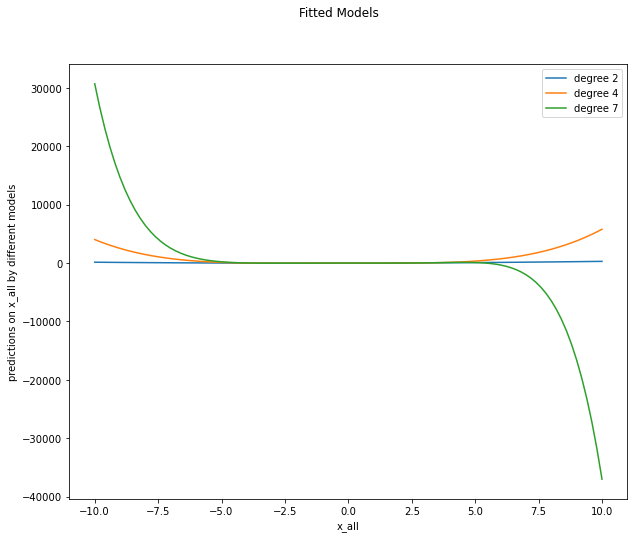

60% data
Training Set MSE with Degree 2: 150.08383759141728
Test Set MSE with Degree 2: 403.2513784833407
Training Set MSE with Degree 4: 29.192805739947893
Test Set MSE with Degree 4: 31.781415416196737
Training Set MSE with Degree 7: 26.099088642454415
Test Set MSE with Degree 7: 60.166672376645465


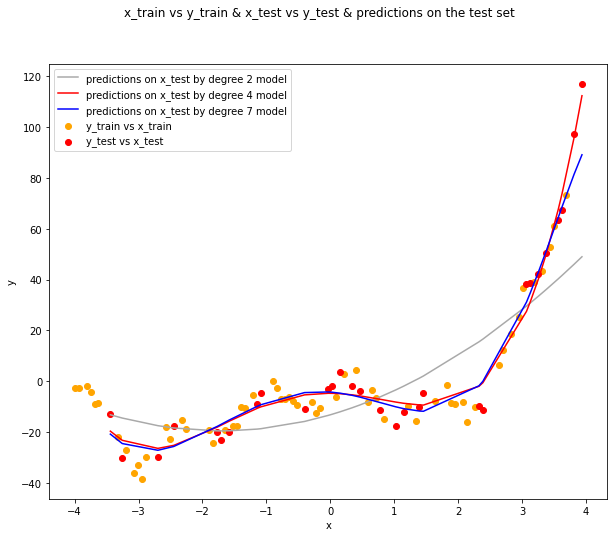

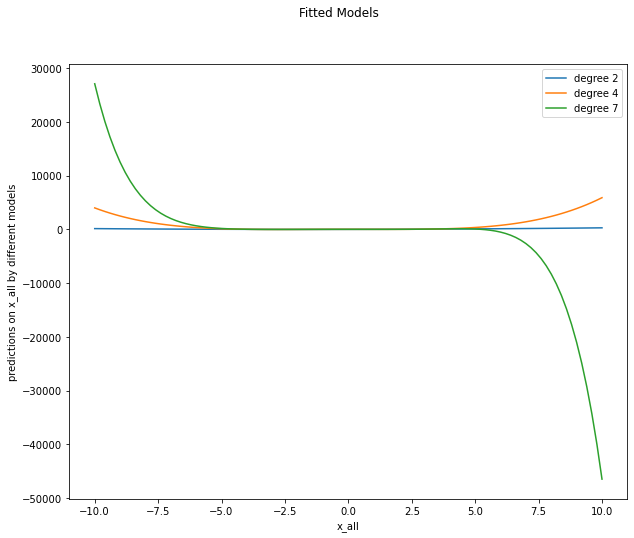

80% data
Training Set MSE with Degree 2: 168.1188246150281
Test Set MSE with Degree 2: 407.59369688184694
Training Set MSE with Degree 4: 29.305108483323444
Test Set MSE with Degree 4: 32.518106868742585
Training Set MSE with Degree 7: 26.549129596283638
Test Set MSE with Degree 7: 48.07693529710776


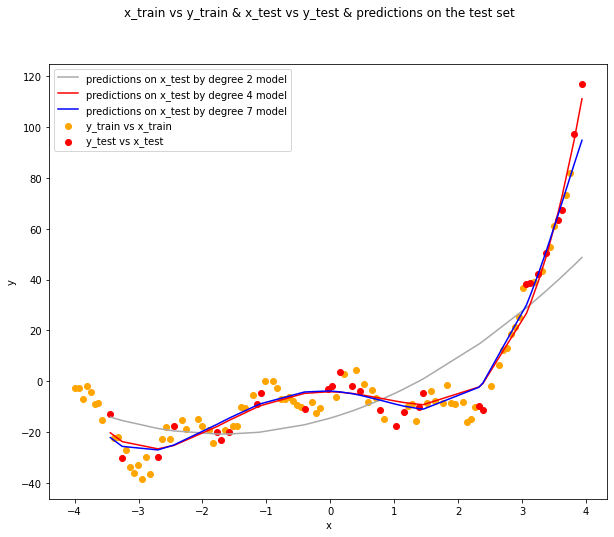

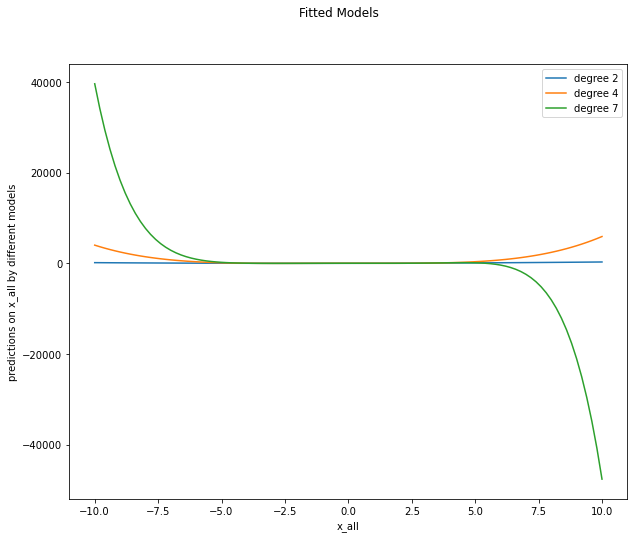

100% data
Training Set MSE with Degree 2: 247.29679797371534
Test Set MSE with Degree 2: 320.0640834697786
Training Set MSE with Degree 4: 31.720018057290055
Test Set MSE with Degree 4: 31.292082886606718
Training Set MSE with Degree 7: 30.677193592109724
Test Set MSE with Degree 7: 33.41069407769015


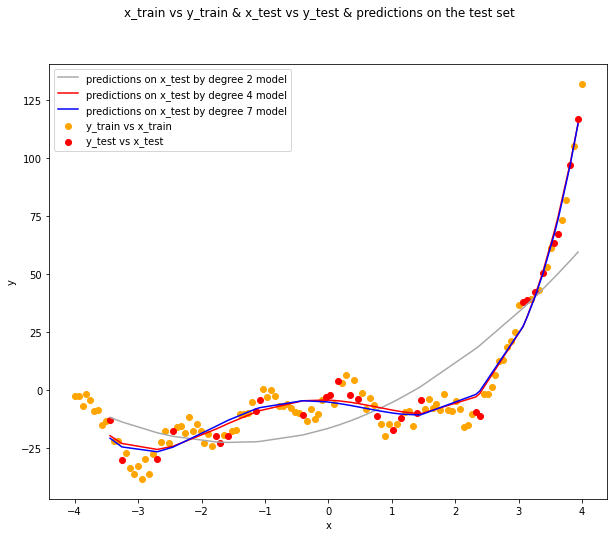

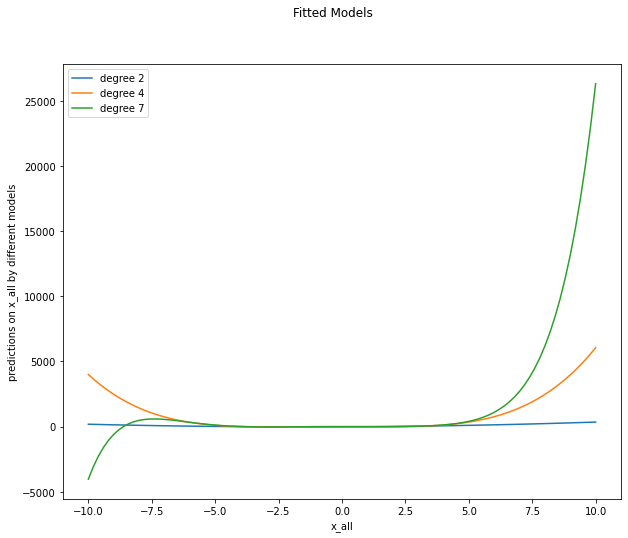

In [4]:
# Study the effects of the training data size on the bias and variance
print("20% data")
train_rmses_20, test_rmses_20 = plot_curves(x_train[40:60], y_train[40:60], x_test, y_test)
print("40% data")
train_rmses_40, test_rmses_40 = plot_curves(x_train[30:70], y_train[30:70], x_test, y_test)
print("60% data")
train_rmses_60, test_rmses_60 = plot_curves(x_train[20:80], y_train[20:80], x_test, y_test)
print("80% data")
train_rmses_80, test_rmses_80 = plot_curves(x_train[10:90], y_train[10:90], x_test, y_test)
print("100% data")
train_rmses_100, test_rmses_100 = plot_curves(x_train, y_train, x_test, y_test)

For all the graphs, the more data set derives better performance in terms of mean-squared-error. The reason for this trends also can be found based on the relationship bewteen bias and variance. As we draw graphs while fixing the complexity, the bias of the model will not change as the size of data increases. However, this increased number of data only causes the lower variacne, reducing the probability of over fitting. In summary, the bias was hold, and variance alone has been reduced, leading the increased performance. 

# Question 3: Gradient descent

a) Compare gradient descent and stochastic gradient descent in terms of their key advantages and disdvantages. Limit your answer to one paragaraph.

b) Read this [blog](https://www.benfrederickson.com/numerical-optimization/) on second order optimization and answer the following question: **How does Nelder-Mead method work? What can be the major problems of Nelder-Mead method?**

## Answer:

a: utilized as an information enabling improvement in the speed taken to find minimum error function, gradient descent has many variants including gradient descent(batch), stochastic gradient descent(sequential), and so on. As gradient descent requires entire training set in evaluating the gradient of the error function, it is computationally expensive. On-line version of gradient descent, SGD is more proper for training neural networks on large data sets. In addition, SGD has advantages over batch gradient in handling redundancy in the data and escaping from local minima.

b: rather than simply going down to the possible minima with fixed step size, Nelder-Mead adapts it's step size, based on the imporvement in the error rate(better error function). In generall, if the result gets better, this approach allows to double the step size, otherwise it makes the size half. Nelder-Mead works well on low-dimensional functions and can even minimize non-differentiable functions.

Even though the problem in question is simple, it, however, performs horribly in the case of high-dimensional functions, which is applicable to the case most of our machine learning problems confront. This happens as the direction to go becomes exponentially difficult in high-dimensional problems.

# Question 4: Stochastic gradient descent

Use stochastic gradient descent to derive the coefficent updates for the 4 coefficients $w_0, w_1, w_2, w_3$ in this model：
$$ y = w_0 + w_1x_1 + w_2 x_1x_2 + w_3e^{-x_1} $$ 

## Answer:

In [5]:
from sympy import Symbol, Derivative
import math

x1 = Symbol('x1')
x2 = Symbol('x2')
w0 = Symbol('w0')
w1 = Symbol('w1')
w2 = Symbol('w2')
w3 = Symbol('w3')
e = Symbol('e')

y_hat = Symbol('y_hat')

In [6]:
y = w0 + w1*x1 + w2*x1*x2 + w3*(e**-x1)
Loss_function = (y-y_hat)**2

partialD_w0 = Derivative(Loss_function, w0)
print('The partial derivative of the loss function in terms of w0 is \n {} \n'.format(partialD_w0.doit()))
print('Thus the value of w0 will be updated by subtracting (LR * the value calculated just before)')
print('\n')

partialD_w1 = Derivative(Loss_function, w1)
print('The partial derivative of the loss function in terms of w1 is \n {} \n'.format(partialD_w1.doit()))
print('Thus the value of w1 will be updated by subtracting (LR * the value calculated just before)')
print('\n')

partialD_w2 = Derivative(Loss_function, w2)
print('The partial derivative of the loss function in terms of w2 is \n {} \n'.format(partialD_w2.doit()))
print('Thus the value of w2 will be updated by subtracting (LR * the value calculated just before)')
print('\n')

partialD_w3 = Derivative(Loss_function, w3)
print('The partial derivative of the loss function in terms of w3 is \n {} \n'.format(partialD_w3.doit()))
print('Thus the value of w3 will be updated by subtracting (LR * the value calculated just before)')

The partial derivative of the loss function in terms of w0 is 
 2*w0 + 2*w1*x1 + 2*w2*x1*x2 - 2*y_hat + 2*e**(-x1)*w3 

Thus the value of w0 will be updated by subtracting (LR * the value calculated just before)


The partial derivative of the loss function in terms of w1 is 
 2*x1*(w0 + w1*x1 + w2*x1*x2 - y_hat + e**(-x1)*w3) 

Thus the value of w1 will be updated by subtracting (LR * the value calculated just before)


The partial derivative of the loss function in terms of w2 is 
 2*x1*x2*(w0 + w1*x1 + w2*x1*x2 - y_hat + e**(-x1)*w3) 

Thus the value of w2 will be updated by subtracting (LR * the value calculated just before)


The partial derivative of the loss function in terms of w3 is 
 2*e**(-x1)*(w0 + w1*x1 + w2*x1*x2 - y_hat + e**(-x1)*w3) 

Thus the value of w3 will be updated by subtracting (LR * the value calculated just before)


# Question 5: Stochastic gradient descent coding

Code an SGD solution in Python for this non-linear model$$ y = w_0 + w_1x_1 + w_2x_1x_2 + w_3e^{-x_1} $$  The template of the solution class is given. The init function of the class takes as input the learning rate, regularization constant and number of epochs. The fit method must take as input X, y. The predict method takes an X value (optionally, an array of values). 

a) Use your new gradient descent regression to predict the data given in 'SGD_samples.csv', for 15 epochs, using learning rates: [0, .0001, .001, .01, 0.1, 1, 10, 100] and regularization (ridge regression) constants: [0,10,100]. For the best 2 combinations of learning_rate and regularization for SGD, plot MSE and the $w$ parameters as a function of epoch (for 15 epochs) . 

b) Report the MSE of the two best combinations of learning rate and regularization constant.

In [7]:
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

class Regression:
    
    def __init__(self, learning_rate, regularization, n_epoch):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.regularization = regularization
        # initialize whichever variables you would need here
        self.coef = np.zeros(4)
        
    def sgd(self, gradient):
        self.coef = self.coef - (self.learning_rate*gradient)
    
    def fit(self, X, y, update_rule='sgd', plot=False):
        mse = []
        coefs = []
        X = self.get_features(X)
        for epoch in range(self.n_epoch):
            for i in range(X.shape[0]):
                # Compute error
                err = (self.linearPredict(X[i])) - y[i]
                
                # Compute gradients
                gradient = np.zeros(4)
                
                for q in range (4):
                    gradient[q] = 2*(err*X[i,q] - self.regularization*self.coef[q])

                # Update weights
                self.sgd(gradient)

            coefs.append(self.coef)
            residuals = y - self.linearPredict(X)         
            mse.append(np.mean(residuals**2))

        self.lowest_mse = mse[-1]
        minima.append(np.mean(residuals**2))
        if plot == True:
            plt.figure()
            plt.plot(range(self.n_epoch),mse)
            plt.xlabel('epoch')
            plt.ylabel('MSE')
            plt.figure()
            coefs = np.array(coefs)
            plt.plot(range(self.n_epoch),coefs[:,0],label='w0')
            plt.plot(range(self.n_epoch),coefs[:,1],label='w1')
            plt.plot(range(self.n_epoch),coefs[:,2],label='w2')
            plt.plot(range(self.n_epoch),coefs[:,3],label='w3')
            plt.legend()
            plt.xlabel('epoch')
            plt.ylabel('parameter value')

    def get_features(self, X):
        '''
        this output of this function can be used to compute the gradient in `fit`
        '''
        x = np.zeros((X.shape[0], 4))
        x[:,0] = 1
        x[:,1] = X[:,0]
        x[:,2] = X[:,0]*X[:,1]
        x[:,3] = np.exp(-X[:,0])
        
        return x
        
    def linearPredict(self, X):
        lp = np.dot(X,self.coef)
        return lp

In [10]:
data = pd.read_csv('SGD_samples.csv')
X = np.array([data['x1'].values, data['x2'].values]).T
y = data['y'].values
n_epochs = 15
learning_rate = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
regularization = [0, 10, 100]

## Answer for Q5-A

/var/folders/gp/5lrc5h3s21d02v2rsj713dxw0000gn/T/ipykernel_39611/3463739925.py:39: RuntimeWarning: overflow encountered in square
  mse.append(np.mean(residuals**2))
/var/folders/gp/5lrc5h3s21d02v2rsj713dxw0000gn/T/ipykernel_39611/3463739925.py:32: RuntimeWarning: overflow encountered in double_scalars
  gradient[q] = 2*(err*X[i,q] - self.regularization*self.coef[q])
/var/folders/gp/5lrc5h3s21d02v2rsj713dxw0000gn/T/ipykernel_39611/3463739925.py:32: RuntimeWarning: invalid value encountered in double_scalars
  gradient[q] = 2*(err*X[i,q] - self.regularization*self.coef[q])
/Users/junsu/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/var/folders/gp/5lrc5h3s21d02v2rsj713dxw0000gn/T/ipykernel_39611/3463739925.py:17: RuntimeWarning: overflow encountered in multiply
  self.coef = self.coef - (self.learning_rate*gradient)


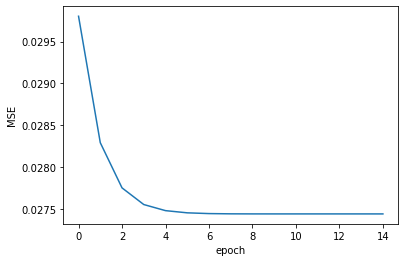

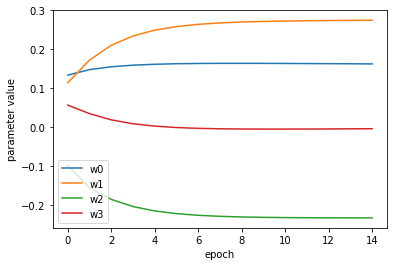

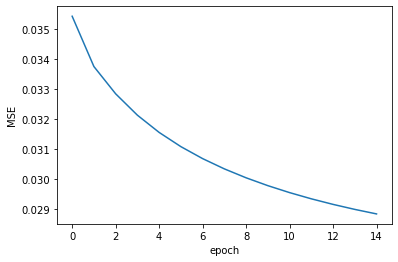

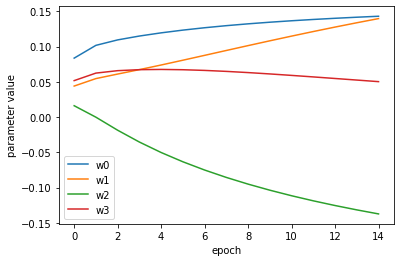

In [11]:
L_R_pair = []
minima = []

for m in learning_rate:
    for n in regularization:
        L_R_pair.append([m,n])
        sgd = Regression(m, n, n_epochs)
        sgd.fit(X, y, update_rule='sgd', plot=False)

idx_min = minima.index(min(minima))
pair_min = L_R_pair[idx_min]

idx_min_2 = minima.index(sorted(minima)[1])
pair_min_2 = L_R_pair[idx_min_2]

sgd_min = Regression(pair_min[0], pair_min[1], n_epochs)
sgd_min.fit(X, y, update_rule='sgd', plot=True)

sgd_min_2 = Regression(pair_min_2[0], pair_min_2[1], n_epochs)
sgd_min_2.fit(X, y, update_rule='sgd', plot=True)

## Answer for Q5-B

In [12]:
print("The best pair of L.R. and Penalty results in MSE of {}".format(minima[idx_min].round(4)))
print("The second best pair of L.R. and Penalty results in MSE of {}".format(minima[idx_min_2].round(4)))


The best pair of L.R. and Penalty results in MSE of 0.0274
The second best pair of L.R. and Penalty results in MSE of 0.0288
